# **Problem : medication classification**


## I. Get the data

**1.Download the data**

In [1]:
from pathlib import Path
import pandas as pd
import zipfile
import urllib.request

def load_medicine_data():
    zip_path = Path("datasets/main.zip")
    if not zip_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/vanquyen607/medicine_dataset/archive/refs/heads/main.zip" # updated URL
        urllib.request.urlretrieve(url, zip_path)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(path="datasets")

    return pd.read_csv(Path("datasets/medicine_dataset-main/Medicine_Details.csv"))

Medicine_Details = load_medicine_data()

**2.Take a Quick Look at the Data Structure**


In [2]:
Medicine_Details.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [3]:
Medicine_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


In [4]:
Medicine_Details["Medicine Name"].value_counts()

,count
Medicine Name,
Lulifin Cream,4
Benadryl Syrup,3
Livoluk Oral Solution,3
Nebistar 5 Tablet,3
Amrolstar Cream,3
...,...
Jubira 10 Tablet,1
Joincerin M Tablet,1
Jupiros 20 Tablet,1


In [5]:
Medicine_Details.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


from matplotlib import pyplot as plt
_df_0['Excellent Review %'].plot(kind='hist', bins=20, title='Excellent Review %')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Average Review %'].plot(kind='hist', bins=20, title='Average Review %')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Poor Review %'].plot(kind='hist', bins=20, title='Poor Review %')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Excellent Review %', y='Average Review %', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Average Review %', y='Poor Review %', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Excellent Review %'].plot(kind='line', figsize=(8, 4), title='Excellent Review %')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Average Review %'].plot(kind='line', figsize=(8, 4), title='Average Review %')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Poor Review %'].plot(kind='line', figsize=(8, 4), title='Poor Review %')
plt.gca().spines[['top', 'right']].set_visible(False)

## II. Explore and visualize the data to gain insights.

**1.Visualizing geographical data**

In [11]:
# Analyzing the distribution of medicines by their uses
use_distribution = Medicine_Details['Uses'].value_counts()

# Analyzing the top manufacturers
manufacturer_distribution = Medicine_Details['Manufacturer'].value_counts()

# Descriptive statistics for review percentages
review_stats = Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']].describe()

use_distribution, manufacturer_distribution.head(), review_stats


(Uses
 Treatment of Type 2 diabetes mellitus                                                   907
 Treatment of Bacterial infections                                                       439
  Hypertension (high blood pressure)                                                     405
  Pain relief                                                                            385
 Treatment of Hypertension (high blood pressure)                                         279
                                                                                        ... 
 Treatment of Hypertensive emergency                                                       1
  Eye infectionTreatment of Inflammatory conditionsTreatment of Autoimmune conditions      1
  Inflammation of gums Mouth ulcers Mouth infection                                        1
 Treatment of Inflammation of gums Local anesthesia (Numb tissues in a specific area)      1
  Blood cancer (Acute lymphocytic leukemia)                     

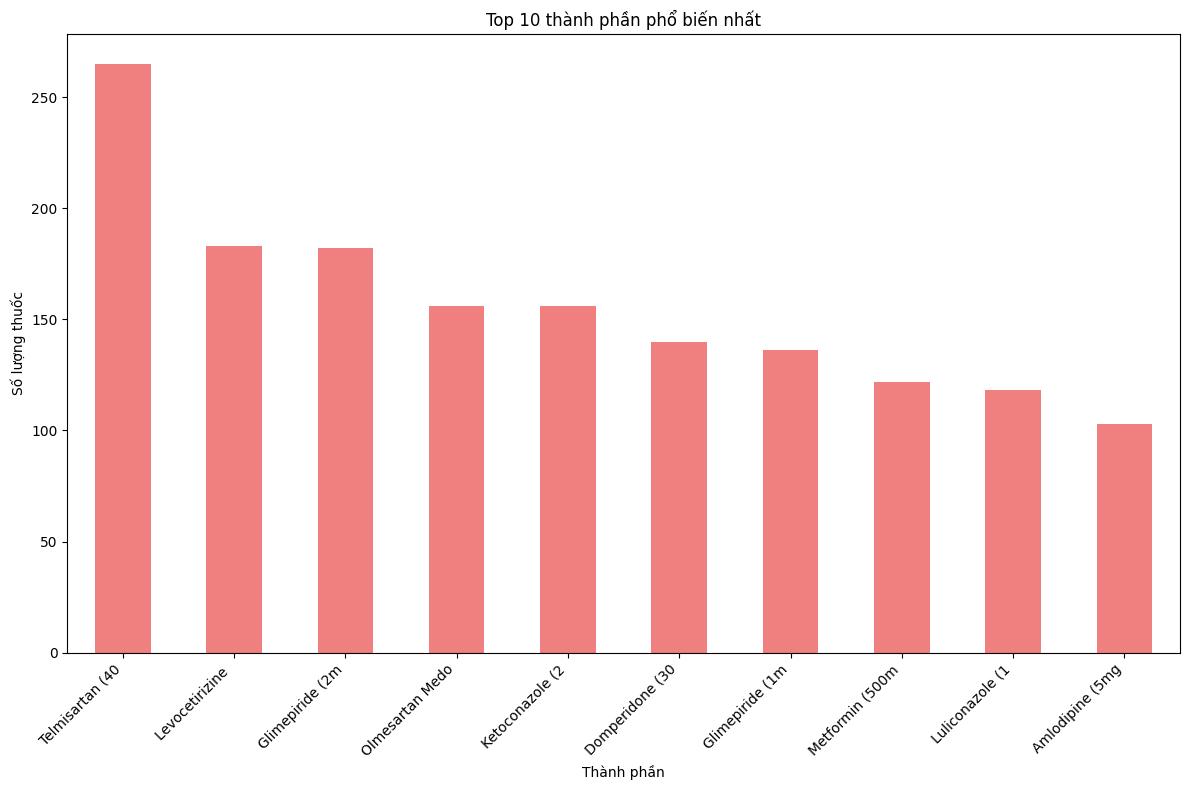

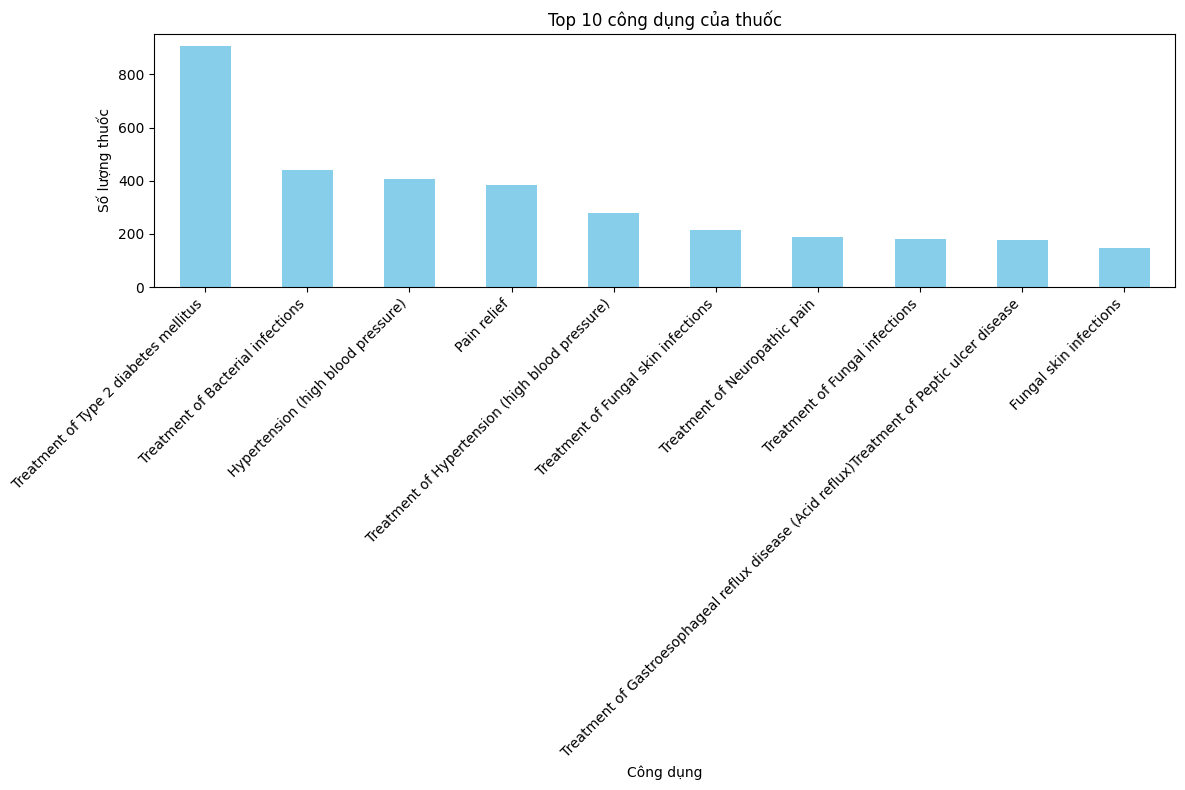

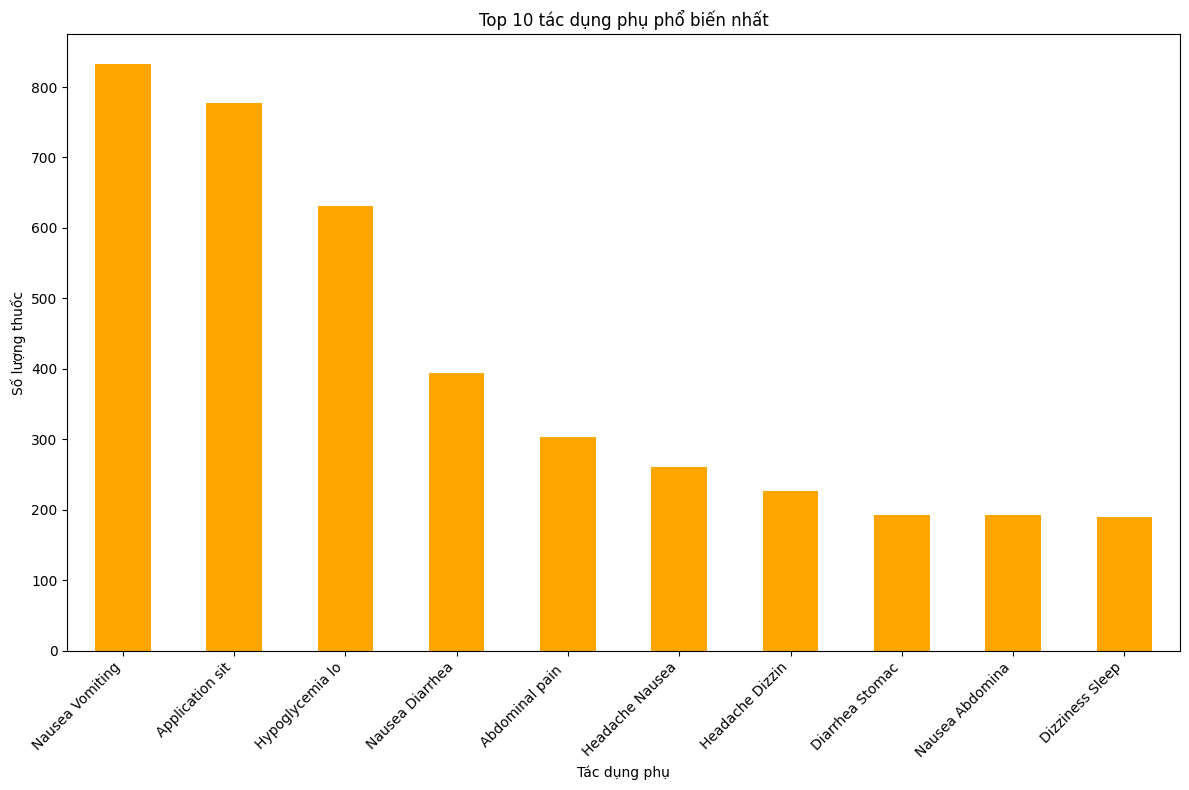

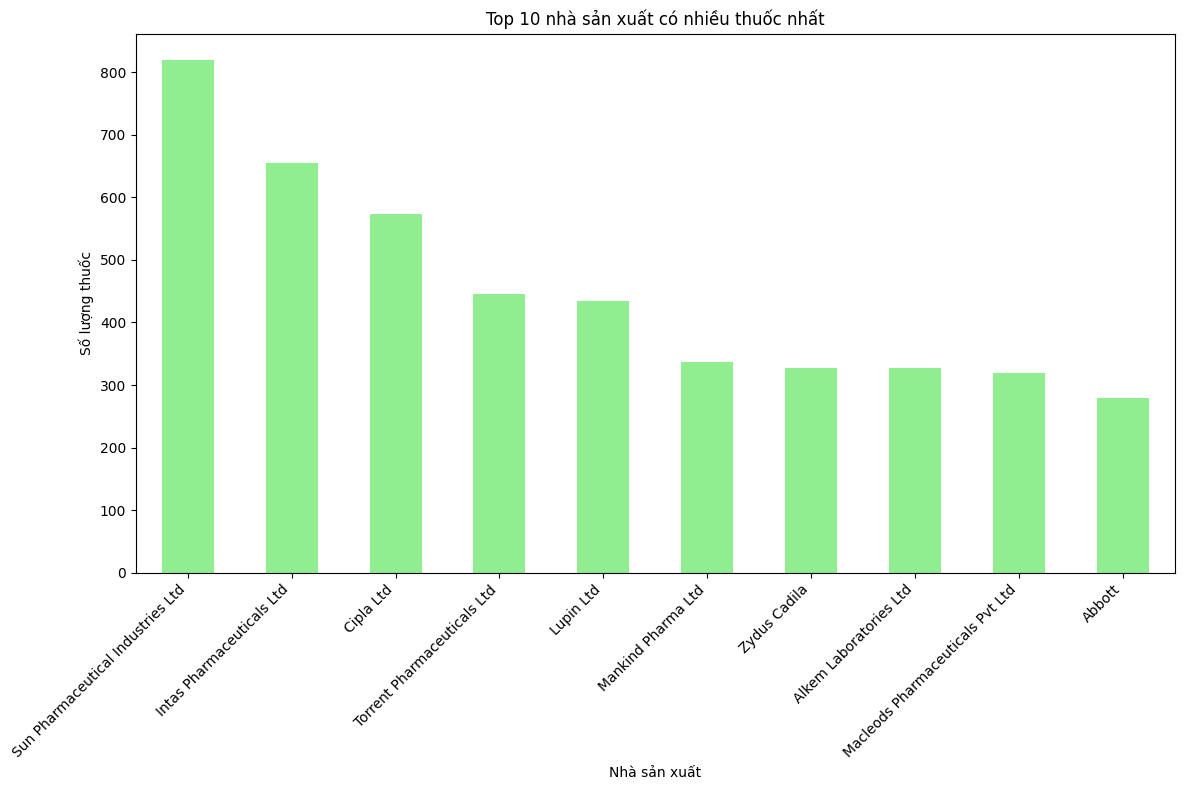

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

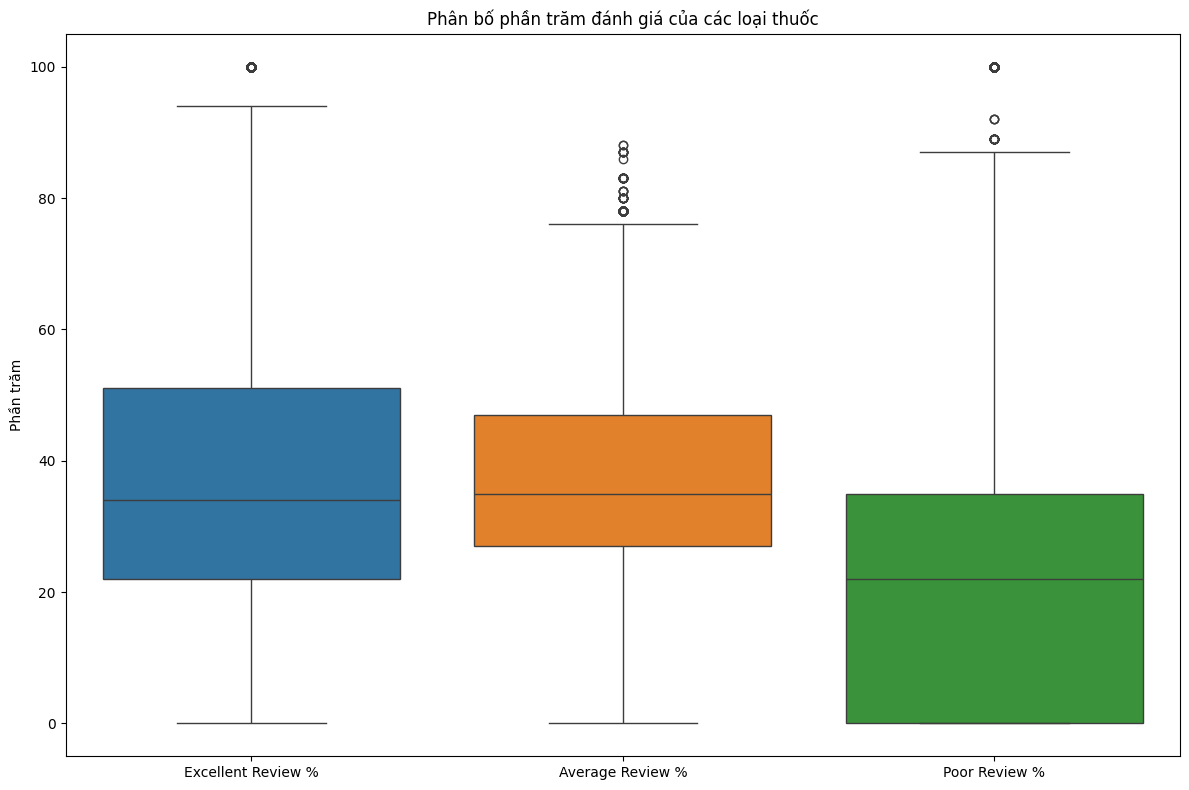

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ cột cho thành phần phổ biến nhất
plt.figure(figsize=(12, 8))
Medicine_Details['Composition'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 thành phần phổ biến nhất')
plt.xlabel('Thành phần')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột cho công dụng thuốc
plt.figure(figsize=(12, 8))
Medicine_Details['Uses'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 công dụng của thuốc')
plt.xlabel('Công dụng')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột cho tác dụng phụ phổ biến nhất
plt.figure(figsize=(12, 8))
Medicine_Details['Side_effects'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 tác dụng phụ phổ biến nhất')
plt.xlabel('Tác dụng phụ')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột cho các nhà sản xuất phổ biến
plt.figure(figsize=(12, 8))
Medicine_Details['Manufacturer'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 nhà sản xuất có nhiều thuốc nhất')
plt.xlabel('Nhà sản xuất')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ boxplot cho phần trăm đánh giá
plt.figure(figsize=(12, 8))
sns.boxplot(data=Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']])
plt.title('Phân bố phần trăm đánh giá của các loại thuốc')
plt.ylabel('Phần trăm')
plt.tight_layout()
plt.show()



**2.Look for correlations**

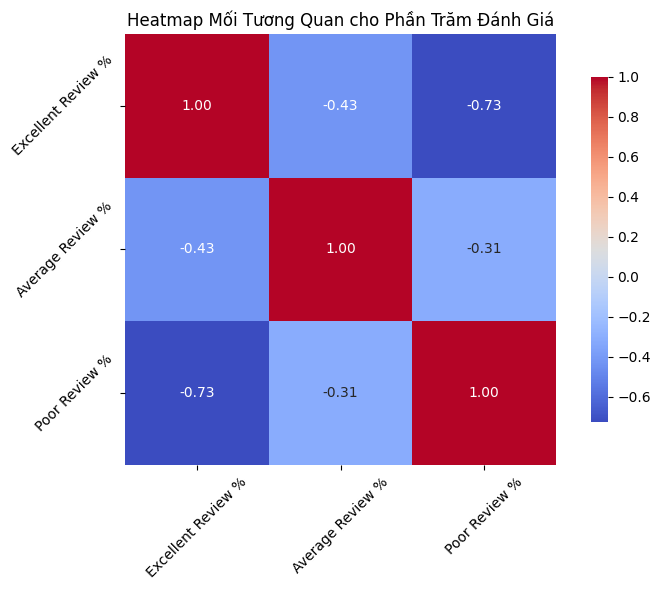

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan cho các phần trăm đánh giá
correlation_matrix = Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']].corr()

# Thiết lập hình vẽ matplotlib
plt.figure(figsize=(8, 6))

# Vẽ heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Tiêu đề và nhãn
plt.title('Heatmap Mối Tương Quan cho Phần Trăm Đánh Giá')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()



In [17]:
# Tìm cặp mối tương quan mạnh nhất
correlation_matrix = Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']].corr()
strongest_correlation = correlation_matrix.unstack().sort_values(ascending=False)

# Lọc ra các mối tương quan không trùng lặp
strongest_correlation = strongest_correlation[strongest_correlation < 1]

# Hiển thị mối tương quan mạnh nhất
strongest_correlation.head(1)


,,0
Average Review %,Poor Review %,-0.311464


**3.Experiment with attribute combinations**

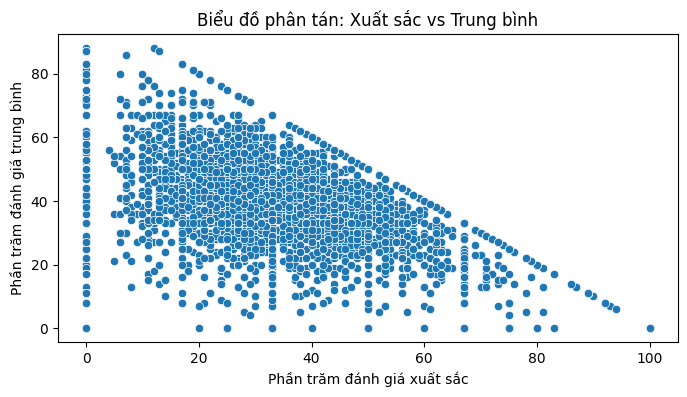

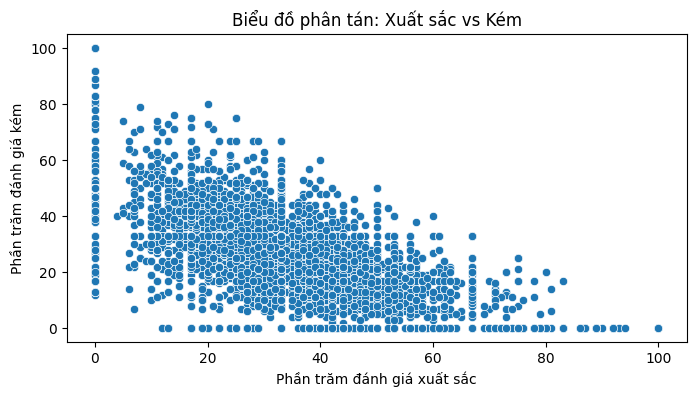

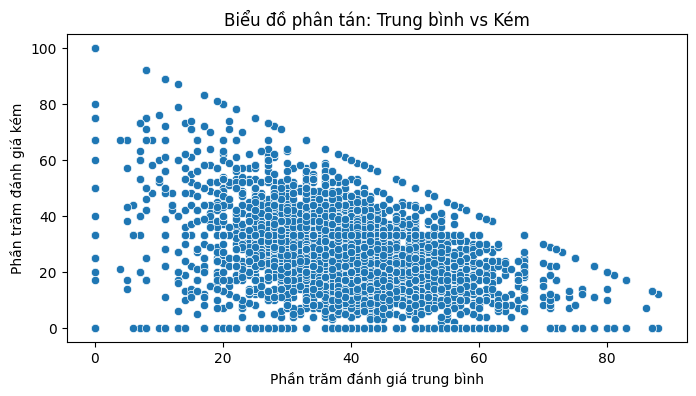

In [18]:
# Vẽ biểu đồ phân tán giữa phần trăm đánh giá xuất sắc và trung bình
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Medicine_Details, x='Excellent Review %', y='Average Review %')
plt.title('Biểu đồ phân tán: Xuất sắc vs Trung bình')
plt.xlabel('Phần trăm đánh giá xuất sắc')
plt.ylabel('Phần trăm đánh giá trung bình')
plt.show()

# Vẽ biểu đồ phân tán giữa phần trăm đánh giá xuất sắc và kém
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Medicine_Details, x='Excellent Review %', y='Poor Review %')
plt.title('Biểu đồ phân tán: Xuất sắc vs Kém')
plt.xlabel('Phần trăm đánh giá xuất sắc')
plt.ylabel('Phần trăm đánh giá kém')
plt.show()

# Vẽ biểu đồ phân tán giữa phần trăm đánh giá trung bình và kém
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Medicine_Details, x='Average Review %', y='Poor Review %')
plt.title('Biểu đồ phân tán: Trung bình vs Kém')
plt.xlabel('Phần trăm đánh giá trung bình')
plt.ylabel('Phần trăm đánh giá kém')
plt.show()


In [19]:
import statsmodels.api as sm

# Xác định biến độc lập và biến phụ thuộc
X = Medicine_Details['Excellent Review %']  # Biến độc lập
y = Medicine_Details['Poor Review %']        # Biến phụ thuộc

# Thêm hằng số vào biến độc lập
X = sm.add_constant(X)

# Tạo mô hình hồi quy
model = sm.OLS(y, X).fit()

# Hiển thị tóm tắt mô hình hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Poor Review %   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                 1.314e+04
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:25:06   Log-Likelihood:                -49936.
No. Observations:               11825   AIC:                         9.988e+04
Df Residuals:                   11823   BIC:                         9.989e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 52.3064      0

## III. Prepare the data for machine learning algorithms.

**1.Clean the data**

**2.Handling text and categorical attributes**

**3.Feature scaling and transformation**

**4.Custom Transformers**

**5.Transformation Pipelines**

**6.Create test set and traning set**

## IV. Select a model and train it

**1.Train and Evaluate on the Training Set**

**2.Better Evaluation Using Cross Validation**

## V. Fine-tune your model

**1.Grid Search**

**2.Randomized Search**

**3.Ensemble Methods**

**4.Analyzing the Best Models and Their Errors**

**5.Evaluate Your System on Test Set**

## VI. Present your solution

## VII.Launch, monitor, and maintain your system